# PHQ ANALYSIS
### Do individuals have higher PHQ-9 scores, indicating more severe depressive symptoms, during the winter season compared to other seasons?
- winter: December, January, February
- spring: March, April, May
- summer: June, July, August
- fall: September, October, November

> ### Does time of day (morning, midday, or evening) affect the total score over the seasons?
> ### Does age affect the total score over the seasons?
> ### Does gender affect the total score over the seasons?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#creating dataframe from dataset (.csv) file and displaying the first 5 rows
path = 'PHQ9 data.csv'
original_df = pd.read_csv(path)
#displaying head of df
original_df.head()

,Unnamed: 0,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,...,q14,q16,q46,q47,happiness.score,time,period.name,start.time,phq.day,id
0,1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,0.0,NaN,NaN,NaN,2,2017-01-22 20:11:59,evening,2017-01-09 07:22:37,-0.951921,1
1,2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,1.0,NaN,3,2017-02-08 22:53:06,evening,2017-01-09 07:22:37,16.159965,1
2,3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,NaN,NaN,NaN,3,2017-02-08 08:00:46,morning,2017-01-09 07:22:37,15.540289,1
3,4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,NaN,1.0,NaN,NaN,2,2017-01-22 14:01:25,midday,2017-01-09 07:22:37,-1.209259,1
4,5,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,2,2017-01-21 15:37:24,midday,2017-01-09 07:22:37,-2.142604,1


In [13]:
#dropping repeated columns and columns not related to our analysis
dropped_df = original_df.drop(columns=['Unnamed: 0', 'id', 'phq.day', 'start.time', 
                                       'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47', 'happiness.score'])
#displaying head of df
dropped_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,age,sex,time,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-22 20:11:59,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-02-08 22:53:06,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-02-08 08:00:46,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-22 14:01:25,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,NaN,NaN,2017-01-21 15:37:24,midday


In [14]:
#creating empty lists to append information to then add as columns to new df
total_scores = []
depression_severity = []
season = []
#looping through dropped_df
for index, row in dropped_df.iterrows():
    #calculating total score for each row and appending to the total_scores list
    total_score = row['phq1'] + row['phq2'] + row['phq3'] + row['phq4'] + row['phq5'] + row['phq6'] + row['phq7'] + row['phq8'] + row['phq9']
    total_scores.append(total_score)
    
    #determining depression severity based on the total score and appending to the depression_severity list
    if pd.isna(total_score):
        depression_severity.append(np.nan)
    elif total_score <= 4:
        depression_severity.append('minimal')
    elif total_score <= 9:
        depression_severity.append('mild')
    elif total_score <= 14:
        depression_severity.append('moderate')
    elif total_score <= 19:
        depression_severity.append('moderately severe')
    else:
        depression_severity.append('severe')
    
    #finding the season based on the time column in dropped_df and appending the season to the season list
    date = row['time'].split()
    year_month_day = date[0].split('-')
    if year_month_day[1] == '12' or  year_month_day[1] == '01' or year_month_day[1] == '02':
        season.append('winter')
    elif year_month_day[1] == '03' or  year_month_day[1] == '04' or year_month_day[1] == '05':
        season.append('spring')
    elif year_month_day[1] == '06' or  year_month_day[1] == '07' or year_month_day[1] == '08':
        season.append('summer')
    else: 
        season.append('fall')
#creating a new df for the column additions
total_scores_df = dropped_df
#adding a total.score, depression.severity, and season column to total_scores_df
total_scores_df['total.score'] = total_scores
total_scores_df['depression.severity'] = depression_severity
total_scores_df['season'] = season
#reordering columns for readability
total_scores_df = total_scores_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,14,15,10,11,12,16,13]]
#displaying head of new df
total_scores_df.head()

,user_id,phq1,phq2,phq3,phq4,phq5,phq6,phq7,phq8,phq9,total.score,depression.severity,age,sex,time,season,period.name
0,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-22 20:11:59,winter,evening
1,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-02-08 22:53:06,winter,evening
2,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-02-08 08:00:46,winter,morning
3,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-22 14:01:25,winter,midday
4,1,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,23.0,severe,NaN,NaN,2017-01-21 15:37:24,winter,midday


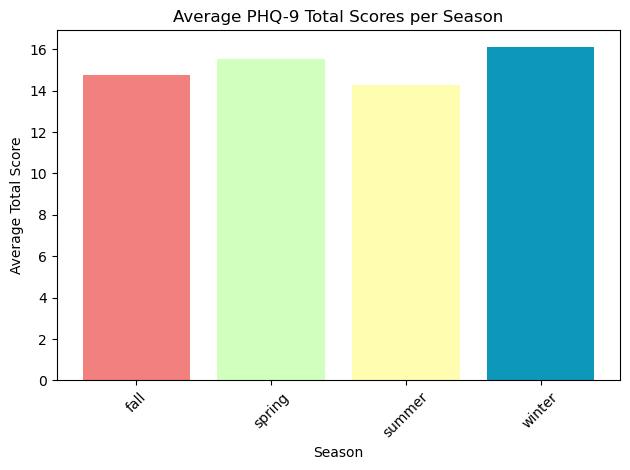

In [15]:
# Group the data by season and calculate the mean of total scores for each season
season_scores = total_scores_df.groupby('season')['total.score'].mean().reset_index()

# Plotting the bar graph
plt.bar(season_scores['season'], season_scores['total.score'], color=['#f1807e', '#D1FFBD', '#fffdaf', '#0D98BA'])
plt.title('Average PHQ-9 Total Scores per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the figure neatly

# Show the plot
plt.show()

In [16]:
#statistics grouped by season then user
agg_df = total_scores_df.groupby(['season', 'user_id'])[['total.score']].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index().rename(columns={0:'n'})
agg_df.head()

season user_id total.score                      
                        mean median  var  std  sem
0   fall       2        24.0   24.0  0.0  0.0  0.0
1   fall       4        17.0   17.0  0.0  0.0  0.0
2   fall       6        18.0   18.0  0.0  0.0  0.0
3   fall       7        23.0   23.0  0.0  0.0  0.0
4   fall       9         9.0    9.0  0.0  0.0  0.0

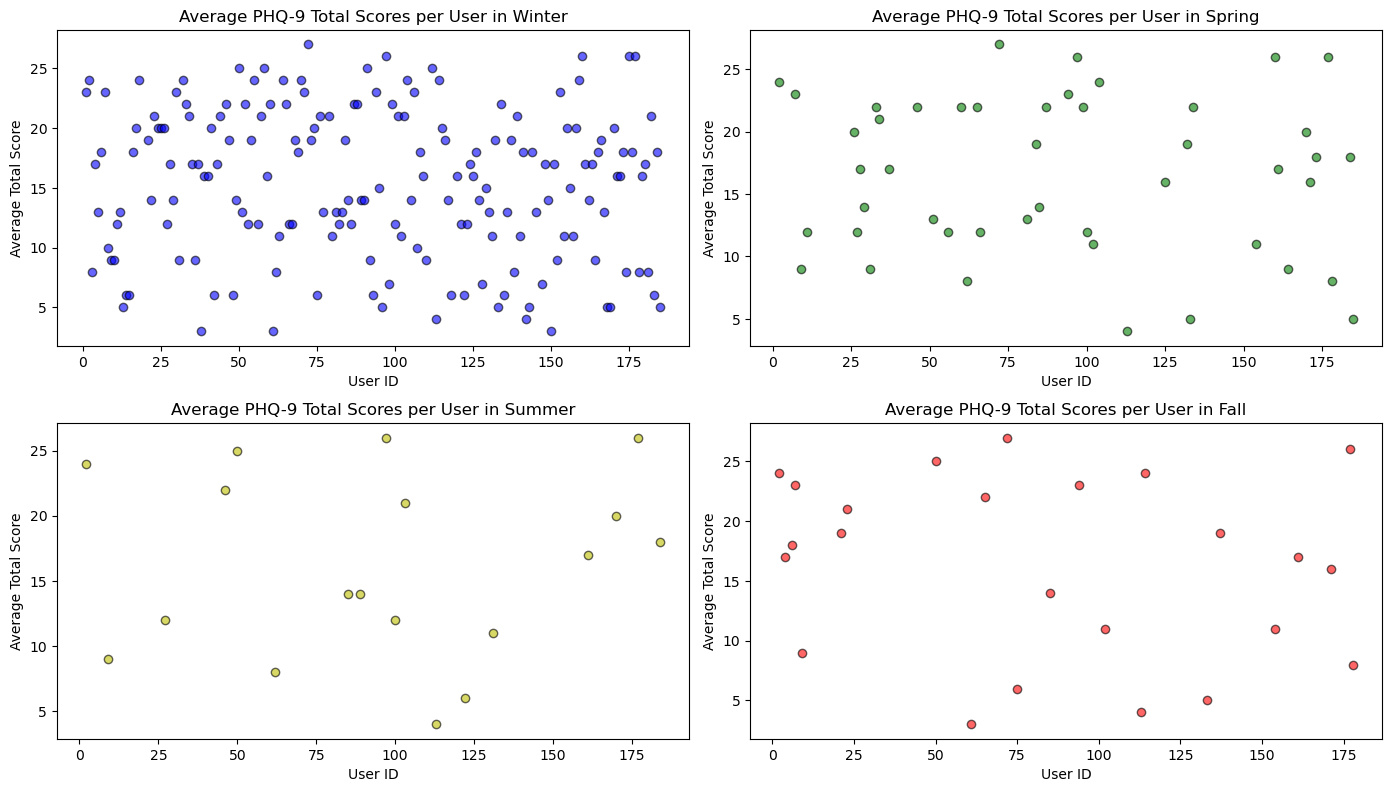

In [25]:
plt.figure(figsize=(14, 8))

#creating a 2x2 plot with 4 subplots
plt.subplot(2, 2, 1)
#scatter plot for winter showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'winter']
plt.scatter(agg_df.loc[agg_df['season'] == 'winter']['user_id'], agg_df.loc[agg_df['season'] == 'winter']['total.score']['mean'],
            alpha=0.6, label=season, color='b', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Winter')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 2)
#scatter plot for spring showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'spring']
plt.scatter(agg_df.loc[agg_df['season'] == 'spring']['user_id'], agg_df.loc[agg_df['season'] == 'spring']['total.score']['mean'],
            alpha=0.6, label=season, color='g', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Spring')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 3)
#scatter plot for summer showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'summer']
plt.scatter(agg_df.loc[agg_df['season'] == 'summer']['user_id'], agg_df.loc[agg_df['season'] == 'summer']['total.score']['mean'],
            alpha=0.6, label=season, color='y', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Summer')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 4)
#scatter plot for fall showing the mean total score for each user 
season_data = total_scores_df[total_scores_df['season'] == 'fall']
plt.scatter(agg_df.loc[agg_df['season'] == 'fall']['user_id'], agg_df.loc[agg_df['season'] == 'fall']['total.score']['mean'], 
            alpha=0.6, label=season, color='r', edgecolor='black', marker='o')
plt.title('Average PHQ-9 Total Scores per User in Fall')
plt.xlabel('User ID')
plt.ylabel('Average Total Score')

#displaying plot
plt.tight_layout(pad=1.0)
plt.show()

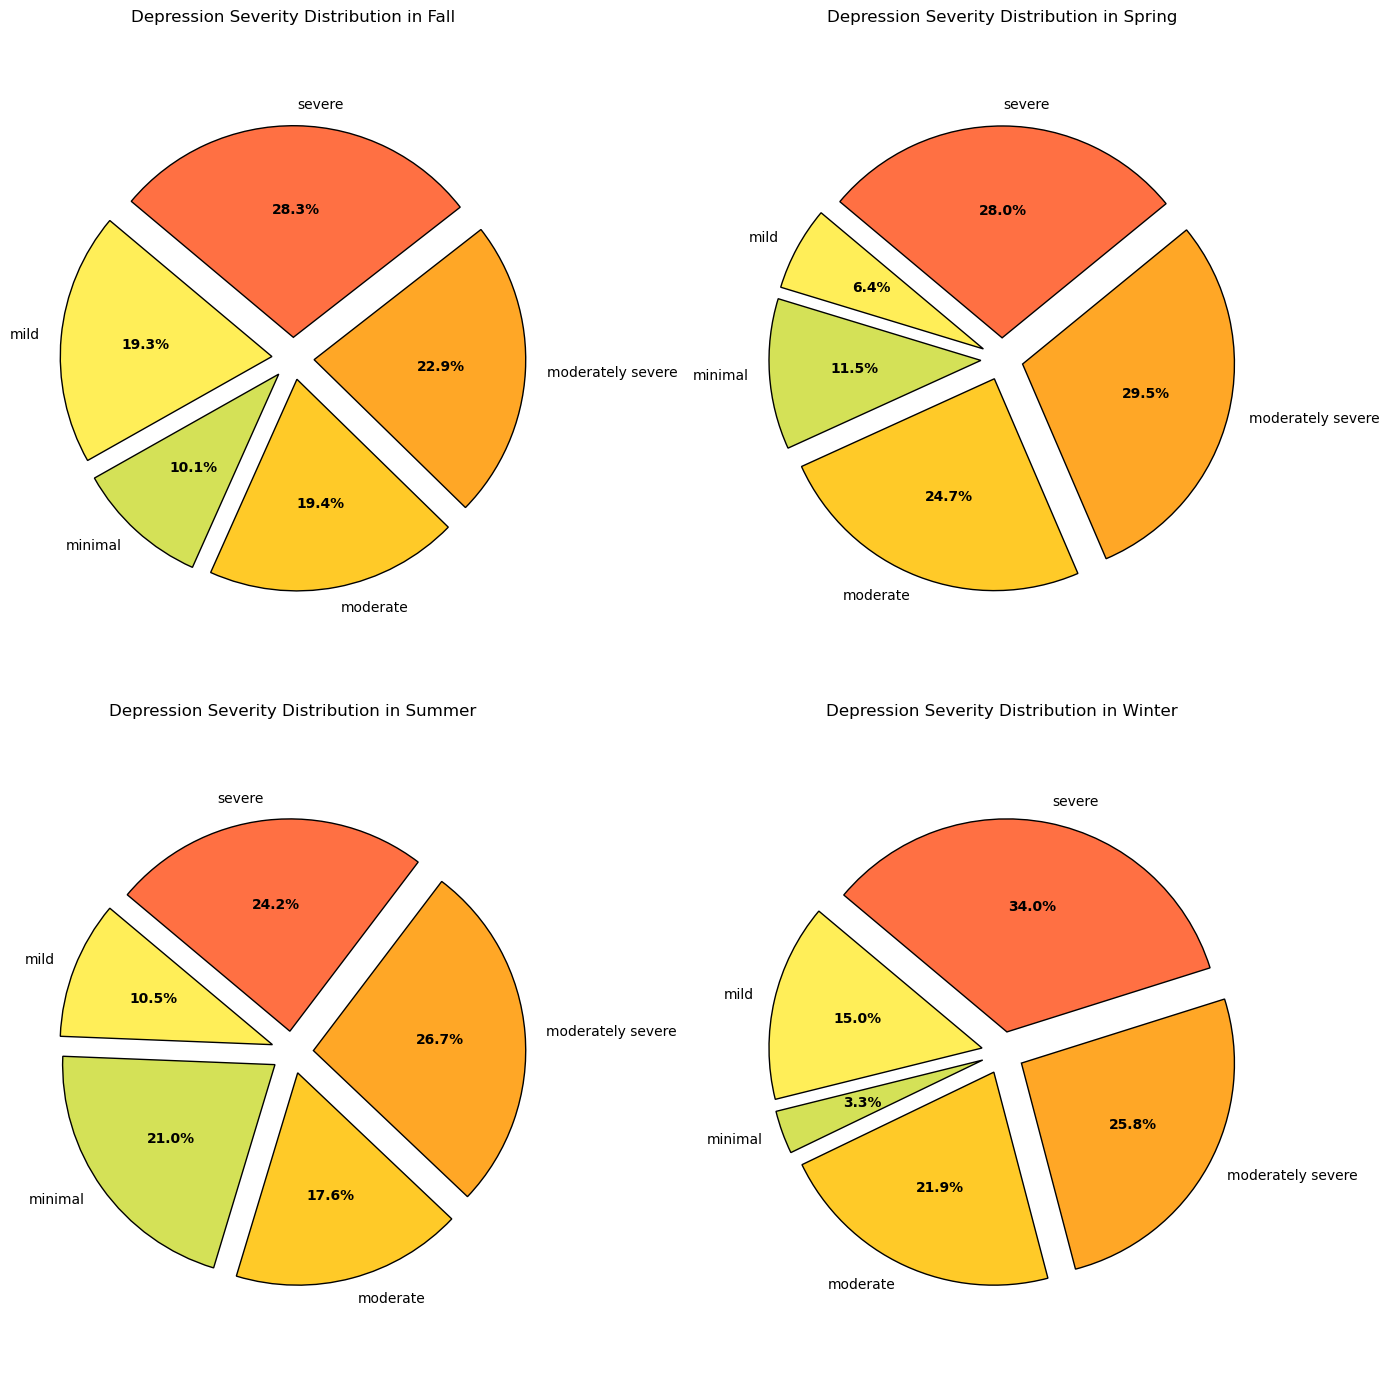

In [18]:
# First, we will count the number of tests taken in each season divided by depression severity
severity_counts_per_season = total_scores_df.groupby('season')['depression.severity'].value_counts().unstack(fill_value=0)

# Define a small gap to separate the pie chart segments
explode_gap = 0.1  # this will separate the slices a little

# Define colors for each severity level, which will be the same across all seasons for consistency
severity_colors = {
    'minimal': '#d4e157',
    'mild': '#ffee58',
    'moderate': '#ffca28',
    'moderately severe': '#ffa726',
    'severe': '#ff7043'
}

# Create subplots for the pie charts
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Loop over each season and create a pie chart with separated segments
for i, (season, counts) in enumerate(severity_counts_per_season.iterrows()):
    ax = axes[i//2, i%2]
    colors = [severity_colors[severity] for severity in counts.index]
    # Explode all segments a little bit
    explode = [explode_gap] * len(counts)
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                                      colors=colors, explode=explode, wedgeprops=dict(linewidth=1, edgecolor='black'))

    # Bold the percentage texts
    for autotext in autotexts:
        autotext.set_weight('bold')

    ax.set_title(f'Depression Severity Distribution in {season.capitalize()}')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so there's no overlap
plt.tight_layout()

# Show the plots
plt.show()

In [19]:
agg_df_gender = total_scores_df.groupby(['season', 'sex'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_gender

season          sex total.score       
                               mean median
0     fall       female   17.036606   17.0
1     fall         male   13.727823   11.0
2     fall  transgender    8.000000    8.0
3   spring       female   17.469557   17.0
4   spring         male   12.469919   11.0
5   spring  transgender    8.000000    8.0
6   summer       female   17.559524   17.0
7   summer         male    9.003333    4.0
8   winter       female   16.860808   18.0
9   winter         male   14.545788   16.0
10  winter  transgender    8.000000    8.0

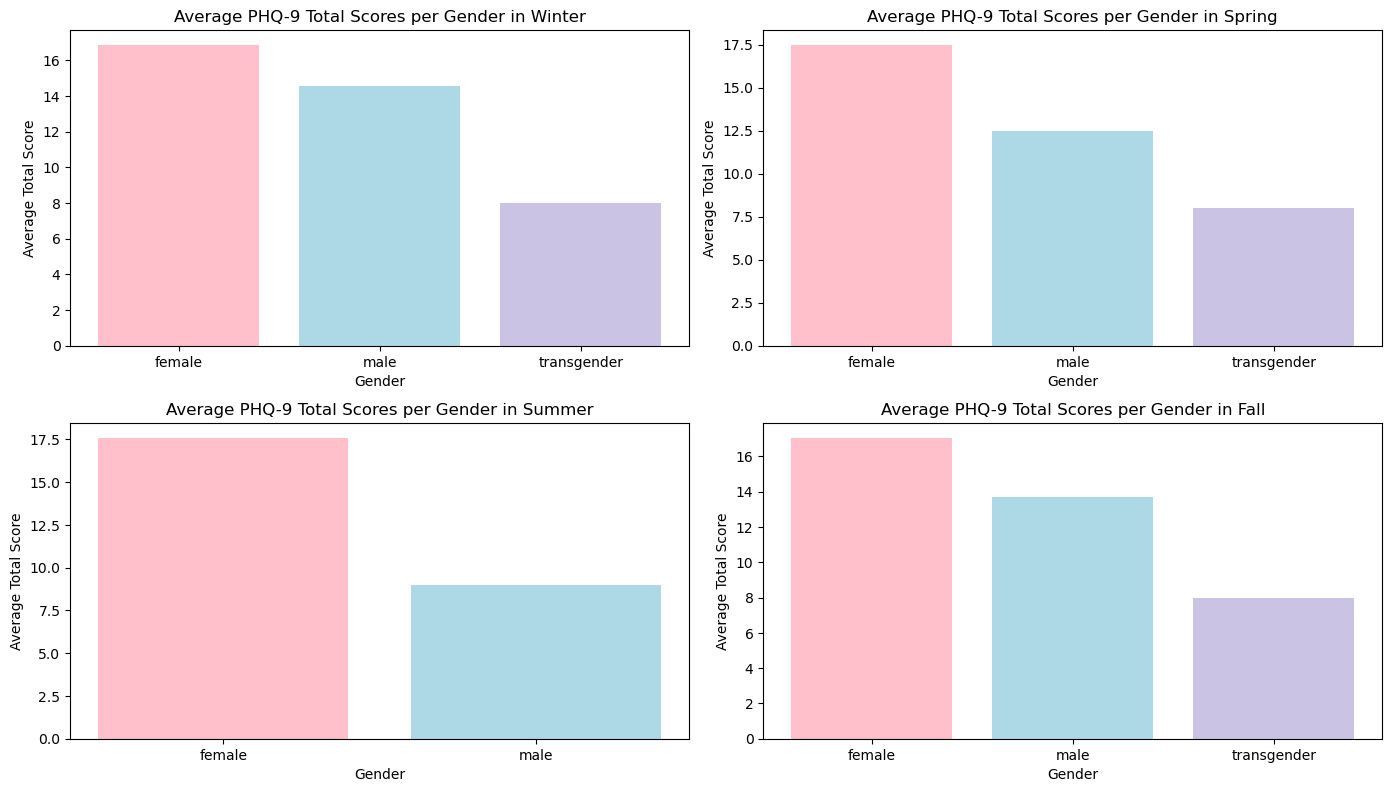

In [20]:
plt.figure(figsize=(14, 8))

#creating a 2x2 plot with 4 subplots
plt.subplot(2, 2, 1)
#bar plot for winter showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'winter']['sex'], 
        agg_df_gender.loc[agg_df_gender['season'] == 'winter']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Winter')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 2)
#bar plot for spring showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'spring']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'spring']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Spring')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 3)
#bar plot for summer showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'summer']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'summer']['total.score']['mean'],
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Summer')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.subplot(2, 2, 4)
#bar plot for fall showing the mean total score for each gender
plt.bar(agg_df_gender.loc[agg_df_gender['season'] == 'fall']['sex'],
        agg_df_gender.loc[agg_df_gender['season'] == 'fall']['total.score']['mean'], 
        color=['#FFC0CB', '#ADD8E6', '#CBC3E3'])
plt.title('Average PHQ-9 Total Scores per Gender in Fall')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

#displaying plot
plt.tight_layout(pad=1.0)
plt.show()

In [22]:
agg_df_time = total_scores_df.groupby(['season', 'period.name'])[['total.score']].agg(['mean', 'median']).reset_index().rename(columns={0:'n'})
agg_df_time

season period.name total.score       
                              mean median
0     fall     evening   14.841743   16.0
1     fall      midday   14.556410   14.0
2     fall     morning   14.885942   17.0
3   spring     evening   15.520408   17.0
4   spring      midday   15.493506   17.0
5   spring     morning   15.510516   17.0
6   summer     evening   14.278638   17.0
7   summer      midday   14.070896   14.0
8   summer     morning   14.451883   17.0
9   winter     evening   16.045200   17.0
10  winter      midday   16.162578   17.0
11  winter     morning   16.141489   17.0

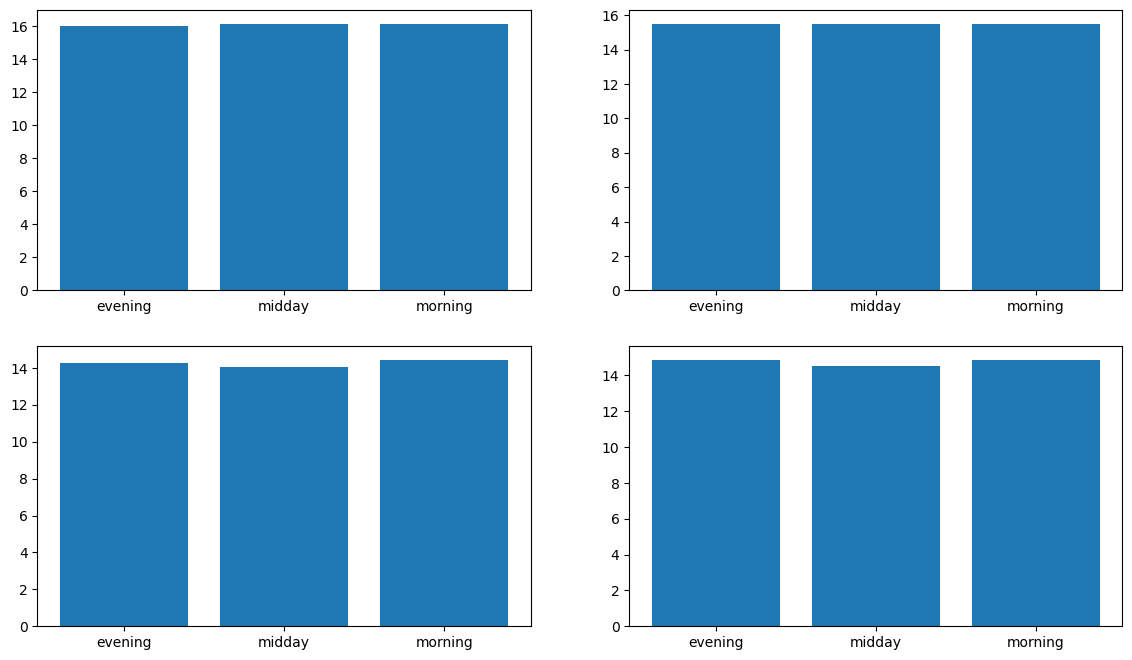

In [23]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'winter']['period.name'], 
        agg_df_time.loc[agg_df_time['season'] == 'winter']['total.score']['mean'])
plt.subplot(2, 2, 2)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'spring']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'spring']['total.score']['mean'])
plt.subplot(2, 2, 3)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'summer']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'summer']['total.score']['mean'])
plt.subplot(2, 2, 4)
plt.bar(agg_df_time.loc[agg_df_time['season'] == 'fall']['period.name'],
        agg_df_time.loc[agg_df_time['season'] == 'fall']['total.score']['mean'])
plt.show()